In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv

pantanos = json.load(open("./pantanos.json", "r", encoding="utf8"))

datasets = []
fechas = []
check = False
for i in pantanos:
    filename = open("./Datasets/" + i +".csv", "r")
    file = csv.DictReader(filename)
    
    data = []
    
    for col in file:
        if not check:
            fechas.append(col['Fecha'])
        data.append(col['Reserva'])
        
    check = True
    datasets.append({i : data})
    
dataBuilder = {"Fechas": fechas}
for i in datasets:
    dataBuilder.update(i)

dataframe = pd.DataFrame(dataBuilder)
dataframe["Fechas"] = pd.to_datetime(dataframe["Fechas"])
dataframe.set_index("Fechas", inplace=True)


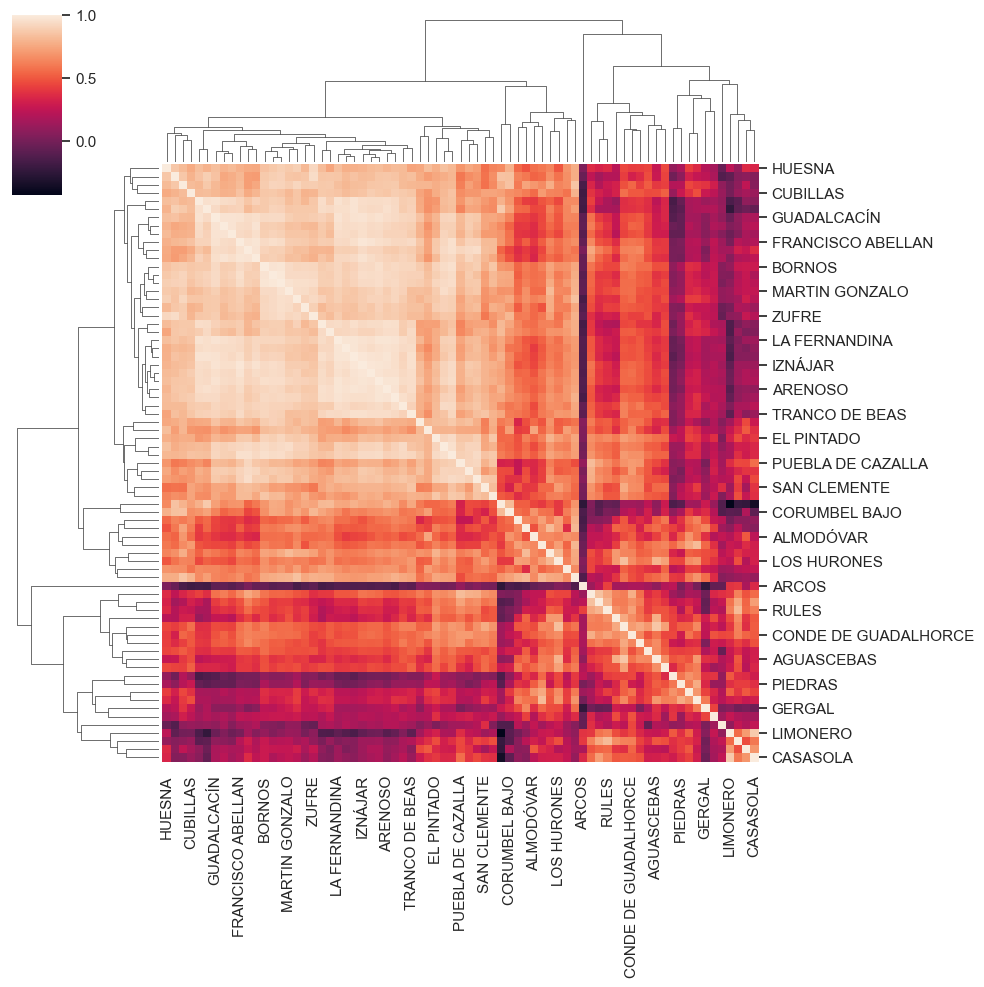

In [26]:
corr_df = dataframe.corr(method='spearman')

sns.set (rc = {'figure.figsize':(20, 25)})

fig = sns.clustermap(corr_df,
    row_cluster=True,
    col_cluster=True,
    figsize=(10, 10));

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90);
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);